# 통계기반 시계열 분석 2
- 수업 내용: Time-series Regression, Binary Variable Model, Trigonometric Model, Growth Curve Model
- 실습 조교: 배진수(wlstn215@korea.ac.kr), 황순혁(shhwang1@korea.ac.kr), 김지현(jihyun_k@korea.ac.kr)

## 1. Correlation Plot

In [ ]:
# 패키지 호출하기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 코랩과 깃허브 연동하시는 분들 참고
# !git https://github.com/bogus215/LG-EDUCATION.git

In [ ]:
# 데이터 읽어오기
example_data = pd.read_csv('./dataset/example-correlation.csv')
example_data

# 코랩과 깃허브 연동하시는 분들 참고
# example_data = pd.read_csv('/content/LG-EDUCATION/dataset/example-correlation.csv')

In [ ]:
# 판다스로 읽은 데이터 객체의 경우 corr 함수를 통해 쉽게 상관계수를 구할 수 있음
exam_corr = example_data.corr()
exam_corr

In [ ]:
# 변수간 상관계수를 히트맵 형태로 시각화
sns.heatmap(exam_corr, annot=True) # annotation: 값을 표기함
plt.show()

## 2.실전 데이터 읽고 Correlation 확인해보기

### Variables in Heart Failure Prediction data
##### - age: age
##### - anaemia: Decrease of red blood cells or hemoglobin (boolean)
##### - creatinine_phosphokinase: evel of the CPK enzyme in the blood (mcg/L)
##### - diabetes: If the patient has diabetes (boolean)
##### - ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
##### - high_blood_pressure: If the patient has hypertension (boolean)
##### - platelets: Platelets in the blood (kiloplatelets/mL)
##### - serum_creatinine: Level of serum creatinine in the blood (mg/dL)
##### - serum_sodium: Level of serum sodium in the blood (mEq/L)

In [ ]:
heart_data = pd.read_csv('./dataset/heart_failure_clinical_records_dataset.csv')
heart_data.head(5)

# 코랩과 깃허브 연동하시는 분들 참고
# heart_data = pd.read_csv('/content/LG-EDUCATION/dataset/heart_failure_clinical_records_dataset.csv')

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
sns.heatmap(heart_data.corr(), annot=True, cmap='YlGnBu') # corr matrix 구하고 heatmap 함수로 시각화
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
sns.pairplot(heart_data) # 변수간(pariwise) 관계성을 파악하는데 유용한 함수
plt.show()

## 3. Auto Correlation 확인해보기

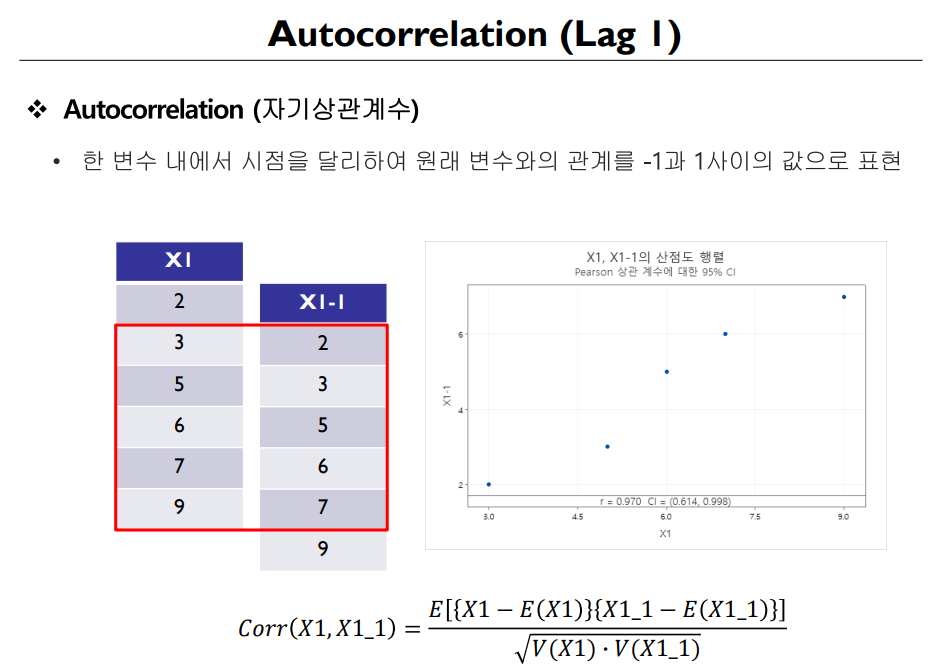

In [ ]:
# 이미지 안 보이시는 분들 참고 
# !pip install IPython ### 패키지 설치
# from IPython.display import Image
# Image('/content/LG-EDUCATION/image/2-1.PNG')

In [ ]:
## 먼저 시각화를 통해 자기상관성이 있는지 확인해보기

time_series_data = example_data['x1']
plt.figure(figsize=(5,5))
plt.plot(time_series_data)
plt.show()

# 양의 자기상관계수를 가질 것으로 기대

In [ ]:
# 자기상관계수를 구하기 위해 시계열 데이터를 1칸 앞으로 이동
example_data['x1_1'] = example_data['x1'].shift(1)

In [ ]:
example_data.head(5)

In [ ]:
# 1칸 앞으로 이동된 시계열 데이터와, 원본 시계열 데이터 시각화
plt.figure(figsize=(4,4))
plt.title('Scatter plot x1 & x1_1', fontsize=14)
plt.scatter(example_data['x1'], example_data['x1_1'])
plt.xlabel('x1', fontsize=14)
plt.ylabel('x1_1', fontsize=14)
plt.show()

## 양의 상관성을 가짐 --> 양의 자기상관성을 가짐

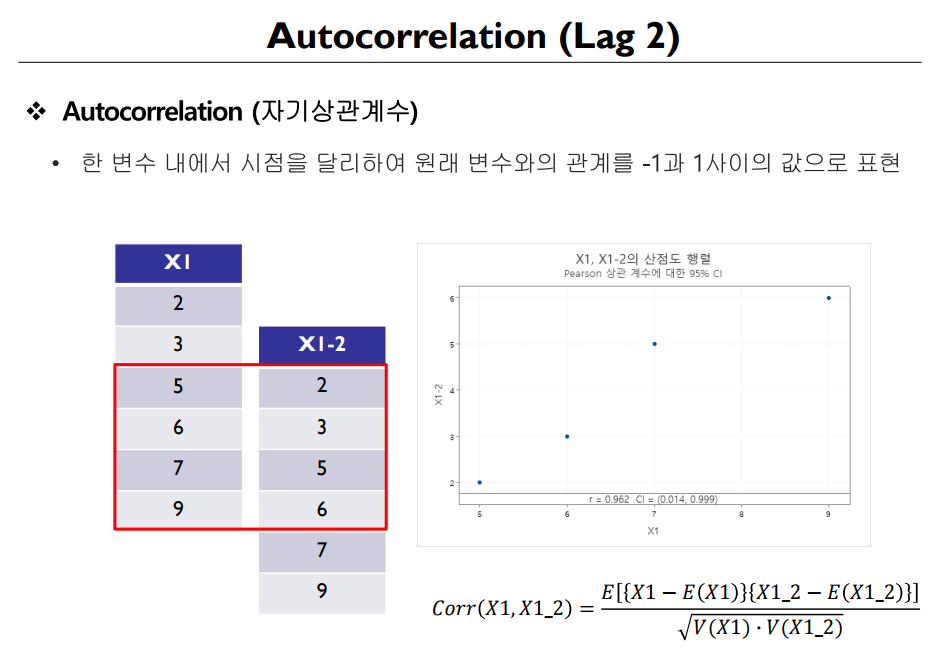

In [ ]:
# 이미지 안 보이시는 분들 참고 
# !pip install IPython ### 패키지 설치
# from IPython.display import Image
# Image('/content/LG-EDUCATION/image/2-2.PNG')

In [ ]:
# lag=2
example_data['x1_2'] = example_data['x1'].shift(2)
example_data.head(5)

In [ ]:
# 2칸 앞으로 이동된 시계열 데이터와, 원본 시계열 데이터 시각화
plt.figure(figsize=(4,4))
plt.title('Scatter plot x1 & x1_2', fontsize=14)
plt.scatter(example_data['x1'], example_data['x1_2'])
plt.xlabel('x1', fontsize=14)
plt.ylabel('x1_2', fontsize=14)
plt.show()

## 4. Dubin-Waston Test (예측 모델의 잔차를 이용한)

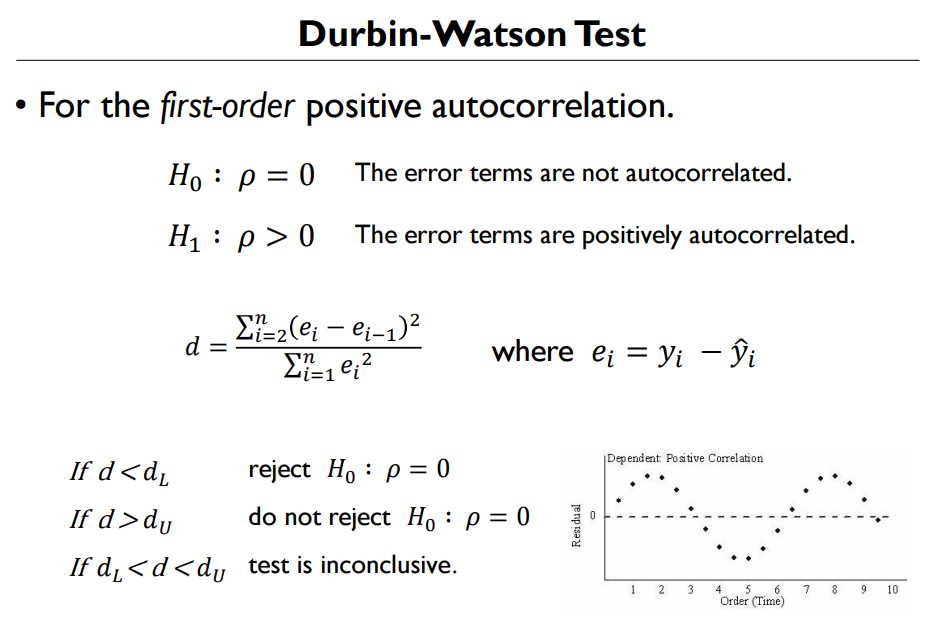

In [ ]:
# 이미지 안 보이시는 분들 참고 
# !pip install IPython ### 패키지 설치
# from IPython.display import Image
# Image('/content/LG-EDUCATION/image/2-3.PNG')

#### 1. statsmodel 패키지를 이용한 더빗 왓슨 통계값 구하기

In [ ]:
from statsmodels.formula.api import ols
import seaborn as sns
linear_data = pd.read_csv('./dataset/linear-trend-data.csv')
linear_model = ols('Sales ~ Time', data=linear_data).fit()
linear_model.summary()

# 코랩과 깃허브 연동하시는 분들 참고
# linear_data = pd.read_csv('/content/LG-EDUCATION/dataset/linear-trend-data.csv')

#### 2. 더빗 왓슨 통계값 직접 구해보기

In [ ]:
# 선형 모델의 잔차를 구하기 위해 선형 모델 학습 및 테스팅
linear_predict = linear_model.predict(linear_data['Time'])
linear_data['residual'] = linear_data['Sales'] - linear_predict
linear_data.head(5)

In [ ]:
# lag-1 잔차 구하기
linear_data['residual_1'] = linear_data['residual'].shift(1)
linear_data.head(5)

In [ ]:
# 더빗 왓슨 통계값 구하는 함수 만들기
def dubin_waston(resid, resid_1):
    return sum((resid[1:]-resid_1[1:])**2)/sum(resid**2)

In [ ]:
dw_value = dubin_waston(linear_data['residual'], linear_data['residual_1'])
print(f'Dubin watson statistic is {dw_value:.3f}')

## 5. Transformation time-series data (로그 변환)

In [ ]:
# 데이터 읽고, 컬럼명 변경하기
airline_data = pd.read_csv('./dataset/international-airline-passengers.csv')
airline_data.rename(columns={airline_data.columns[1]: 'passengers'}, inplace=True)

# 코랩과 깃허브 연동하시는 분들 참고
# airline_data = pd.read_csv('/content/LG-EDUCATION/dataset/international-airline-passengers.csv')

In [ ]:
# 원본 시계열 데이터 시각화
fig = plt.figure(figsize=(6,4))
plt.plot(airline_data['passengers']) #변동폭이 점점 커지는 것을 확인 가능함
plt.title('International airline passengers', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Passengers', fontsize=12)

plt.show()

In [ ]:
# 제곱근 시계열 데이터 시각화
airline_data['squared_passengers'] = np.sqrt(airline_data['passengers'])

fig = plt.figure(figsize=(6,4))
plt.plot(airline_data['squared_passengers'])
plt.title('International airline passengers', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Root(Passengers)', fontsize=12)

plt.show()

In [ ]:
# 로그 시계열 데이터 시각화
airline_data['log_passengers'] = np.log(airline_data['passengers'])

fig = plt.figure(figsize=(6,4))
plt.plot(airline_data['log_passengers'])
plt.title('International airline passengers', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('log(Passengers)', fontsize=12)

plt.show()

In [ ]:
# 이중 로그 시계열 데이터 시각화
airline_data['2log_passengers'] = np.log(airline_data['log_passengers'])

fig = plt.figure(figsize=(6,4))
plt.plot(airline_data['2log_passengers'])
plt.title('International airline passengers', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('log(log(Passengers))', fontsize=12)

plt.show()